In [1]:
%pip install seaborn

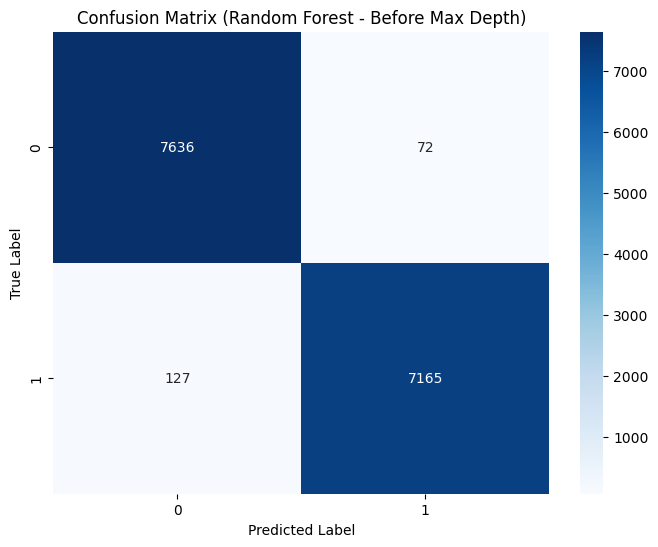

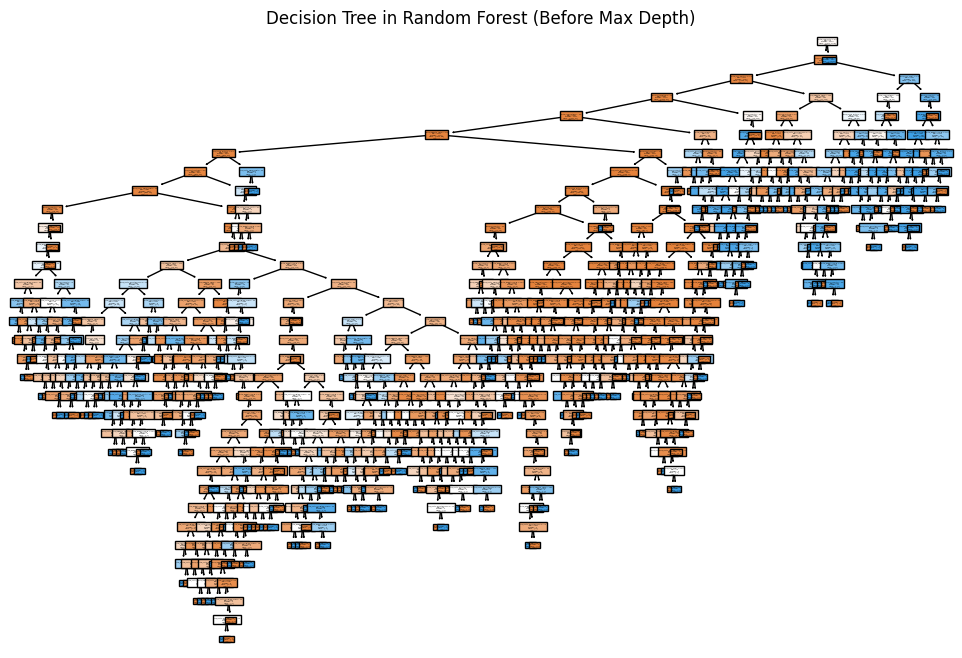

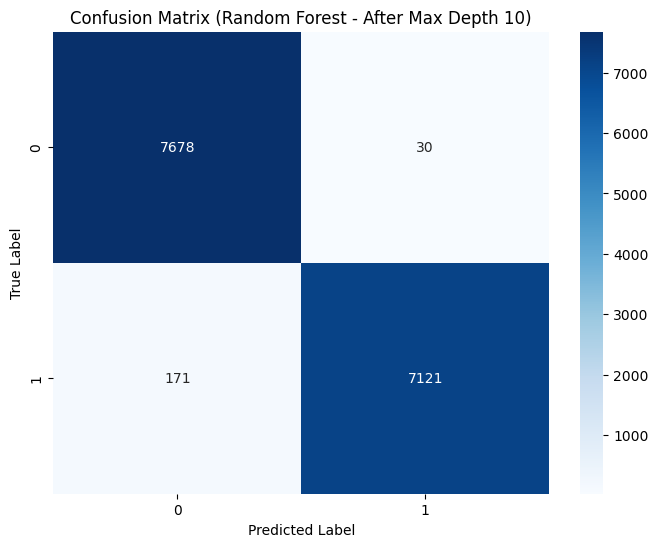

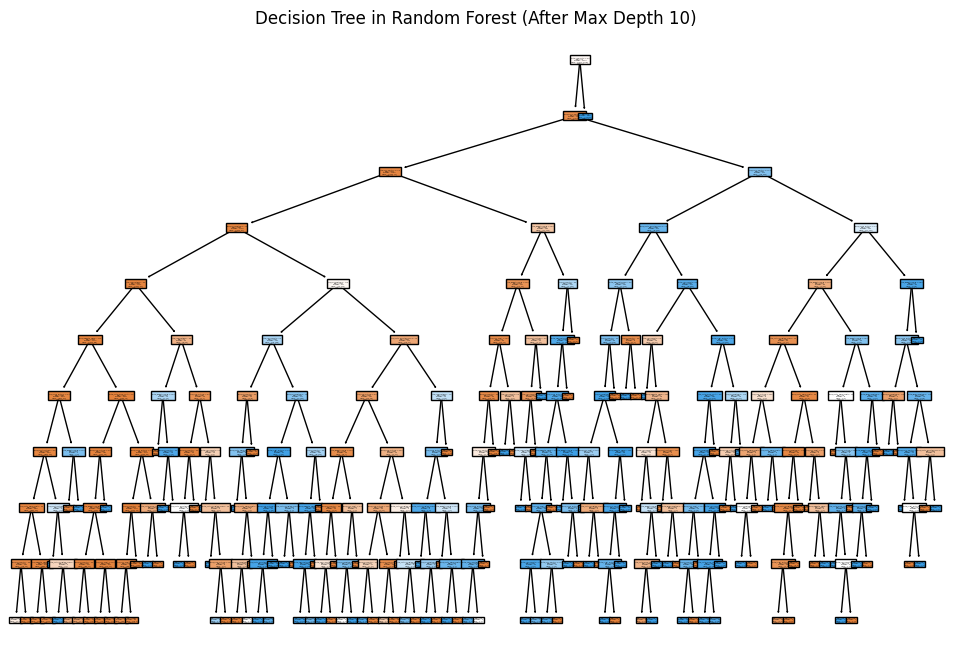

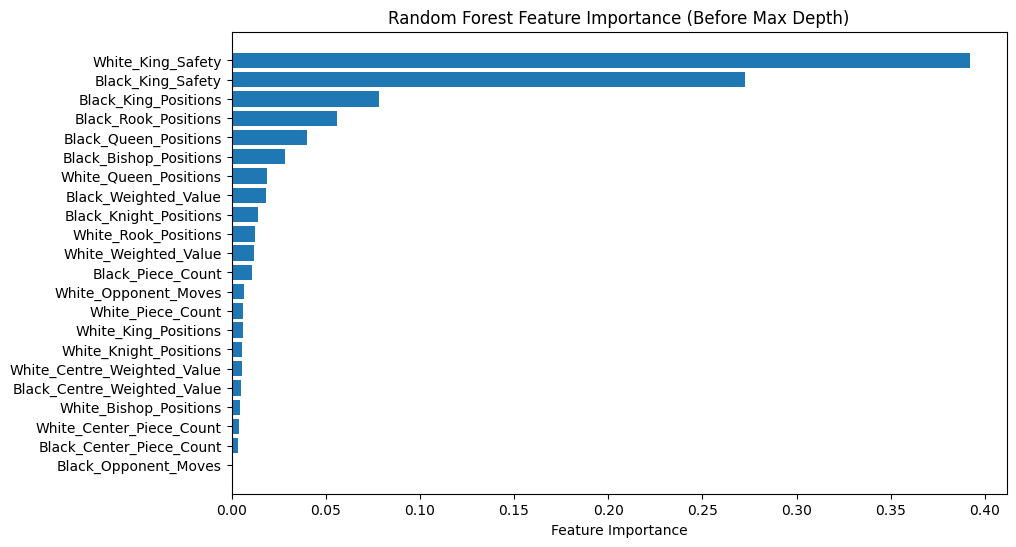

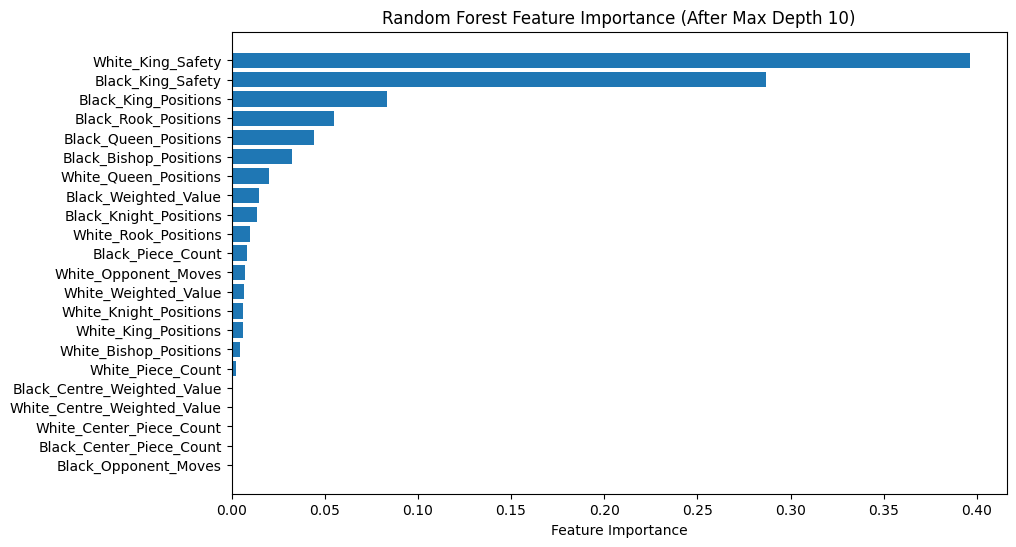

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
game = pd.read_csv("subset.csv")
game = game.set_axis(['Winner', 'White_Weighted_Value', 'Black_Weighted_Value',
                     'White_Centre_Weighted_Value', 'Black_Centre_Weighted_Value',
                     'White_King_Safety', 'Black_King_Safety',
                     'White_Piece_Count', 'Black_Piece_Count',
                     'White_Center_Piece_Count', 'Black_Center_Piece_Count',
                     'White_Opponent_Moves', 'Black_Opponent_Moves',
                     'White_Rook_Positions', 'White_Queen_Positions',
                     'White_Knight_Positions', 'White_King_Positions', 'White_Bishop_Positions',
                     'Black_Rook_Positions', 'Black_Queen_Positions',
                     'Black_Knight_Positions', 'Black_King_Positions', 'Black_Bishop_Positions'], axis=1)

# Pre-processing our engineered features (Y/N->0/1)
encoder = LabelEncoder()
game["White_King_Safety"] = encoder.fit_transform(game["White_King_Safety"])
game["Black_King_Safety"] = encoder.fit_transform(game["Black_King_Safety"])
game["Winner"] = encoder.fit_transform(game["Winner"])

# X(predictors), y (target)
X = game.drop(columns=["Winner"])
y = game["Winner"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier without max depth restriction
rf_classifier_before = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier_before.fit(X_train, y_train)

# Make predictions on the test data
y_pred_before = rf_classifier_before.predict(X_test)

# Evaluate the model's accuracy
accuracy_before = accuracy_score(y_test, y_pred_before)
precision_before = precision_score(y_test, y_pred_before)
recall_before = recall_score(y_test, y_pred_before)
f1_before = f1_score(y_test, y_pred_before)

# Generate a classification report and confusion matrix before setting max depth
classification_rep_before = classification_report(y_test, y_pred_before)
conf_matrix_before = confusion_matrix(y_test, y_pred_before)

# Plot the confusion matrix before setting max depth
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_before, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix (Random Forest - Before Max Depth)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the first tree in the forest before setting max depth
plt.figure(figsize=(12, 8))
plot_tree(rf_classifier_before.estimators_[0], filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.title("Decision Tree in Random Forest (Before Max Depth)")
plt.show()

# Create a Random Forest classifier with max depth of 10
rf_classifier_after = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training data
rf_classifier_after.fit(X_train, y_train)

# Make predictions on the test data
y_pred_after = rf_classifier_after.predict(X_test)

# Evaluate the model's accuracy
accuracy_after = accuracy_score(y_test, y_pred_after)
precision_after = precision_score(y_test, y_pred_after)
recall_after = recall_score(y_test, y_pred_after)
f1_after = f1_score(y_test, y_pred_after)

# Generate a classification report and confusion matrix after setting max depth
classification_rep_after = classification_report(y_test, y_pred_after)
conf_matrix_after = confusion_matrix(y_test, y_pred_after)

# Plot the confusion matrix after setting max depth
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_after, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix (Random Forest - After Max Depth 10)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the first tree in the forest after setting max depth
plt.figure(figsize=(12, 8))
plot_tree(rf_classifier_after.estimators_[0], filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.title("Decision Tree in Random Forest (After Max Depth 10)")
plt.show()

# Feature Importance Plot before setting max depth
feature_importance_before = rf_classifier_before.feature_importances_
sorted_idx_before = np.argsort(feature_importance_before)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_before)), feature_importance_before[sorted_idx_before], align="center")
plt.yticks(range(len(sorted_idx_before)), X.columns[sorted_idx_before])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (Before Max Depth)")
plt.show()

# Feature Importance Plot after setting max depth
feature_importance_after = rf_classifier_after.feature_importances_
sorted_idx_after = np.argsort(feature_importance_after)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_after)), feature_importance_after[sorted_idx_after], align="center")
plt.yticks(range(len(sorted_idx_after)), X.columns[sorted_idx_after])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (After Max Depth 10)")
plt.show()



